In [1]:
#This is the E in ETL, we are extracting data from a CSV file.


In [3]:
import pandas as pd
import csv

# Read the data into a pandas DataFrame
data = pd.read_csv("downloads/products.csv", delimiter=";", encoding="utf-8")

# Drop the first column
data = data.drop(columns=data.columns[0])

# Save the result back to a CSV file
data.to_csv("updated_file.csv", index=False, sep=";")

with open('updated_file.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        print(lines)

    

['Product ID;Category;Sub-Category;Product Name;Sales;Quantity;Discount;Profit']
['FUR-BO-10001798;Furniture;Bookcases;Bush Somerset Collection Bookcase;261', '96;2;0;41', '9136']
['FUR-CH-10000454;Furniture;Chairs;Hon Deluxe Fabric Upholstered Stacking Chairs', ' Rounded Back;731', '94;3;0;219', '582']
['OFF-LA-10000240;Office Supplies;Labels;Self-Adhesive Address Labels for Typewriters by Universal;14', '62;2;0;6', '8714']
['FUR-TA-10000577;Furniture;Tables;Bretford CR4500 Series Slim Rectangular Table;957', '5775;5;0', '45;-383', '031']
["OFF-ST-10000760;Office Supplies;Storage;Eldon Fold 'N Roll Cart System;22", '368;2;0', '2;2', '5164']
['FUR-FU-10001487;Furniture;Furnishings;Eldon Expressions Wood and Plastic Desk Accessories', ' Cherry Wood;48', '86;7;0;14', '1694']
['OFF-AR-10002833;Office Supplies;Art;Newell 322;7', '28;4;0;1', '9656']
['TEC-PH-10002275;Technology;Phones;Mitel 5320 IP Phone VoIP phone;907', '152;6;0', '2;90', '7152']
['OFF-BI-10003910;Office Supplies;Binders;D

In [5]:
# Handle missing values (e.g., fill with 0 or forward fill)
data.fillna(0, inplace=True)

# Remove duplicate rows based on all columns
df_cleaned = data.drop_duplicates()


# Handle malformed 'Profit' values (filter out non-numeric and replace commas)
def clean_profit_value(value):
    try:
        # Remove commas and convert to float
        return float(str(value).replace(',', ''))
    except ValueError:
        # If there's an error (invalid value), return NaN or a default value
        return None

# Clean the 'Profit' column
df_cleaned['Profit'] = df_cleaned['Profit'].apply(clean_profit_value)

# Print the cleaned 'Profit' column
print("\nAfter cleaning 'Profit' column:")
print(df_cleaned)

# Aggregate data: Example of summing sales per category
df_aggregated = df_cleaned.groupby('Category').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Profit': 'sum'
}).reset_index()
print("\nAfter aggregation (sum of sales, quantity, and profit per category):")
print(df_aggregated)

# Format 'Sales' column by removing commas and converting to float
df_aggregated['Sales'] = df_aggregated['Sales'].apply(lambda x: float(str(x).replace(',', '')))

print("\nAfter formatting 'Sales' column (removing commas):")
print(df_aggregated)






After cleaning 'Profit' column:
         Product ID         Category Sub-Category  \
0   FUR-BO-10001798        Furniture    Bookcases   
1   FUR-CH-10000454        Furniture       Chairs   
2   OFF-LA-10000240  Office Supplies       Labels   
3   FUR-TA-10000577        Furniture       Tables   
4   OFF-ST-10000760  Office Supplies      Storage   
..              ...              ...          ...   
95  OFF-BI-10004738  Office Supplies      Binders   
96  FUR-FU-10000629        Furniture  Furnishings   
97  OFF-BI-10001721  Office Supplies      Binders   
98  OFF-AP-10000358  Office Supplies   Appliances   
99  OFF-PA-10003256  Office Supplies        Paper   

                                         Product Name     Sales  Quantity  \
0                   Bush Somerset Collection Bookcase    261,96         2   
1   Hon Deluxe Fabric Upholstered Stacking Chairs,...    731,94         3   
2   Self-Adhesive Address Labels for Typewriters b...     14,62         2   
3       Bretford CR450

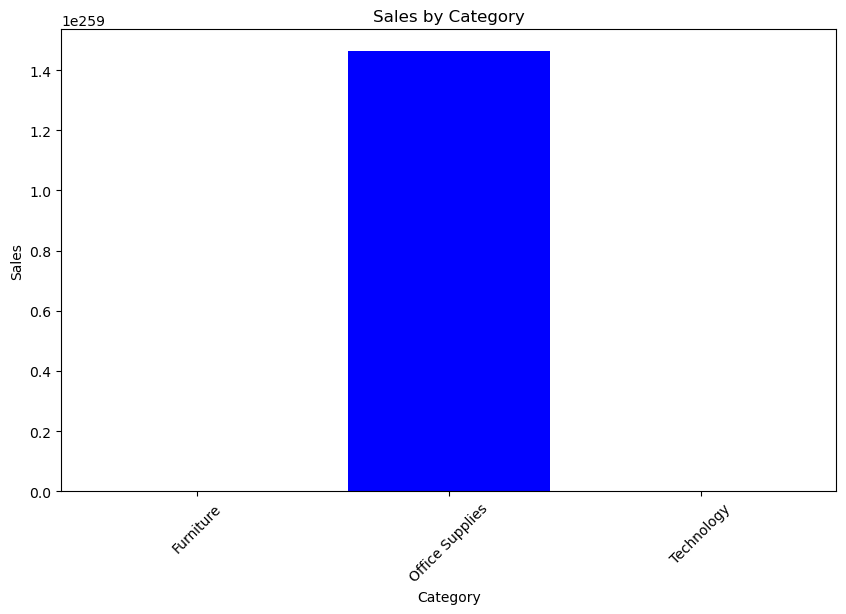

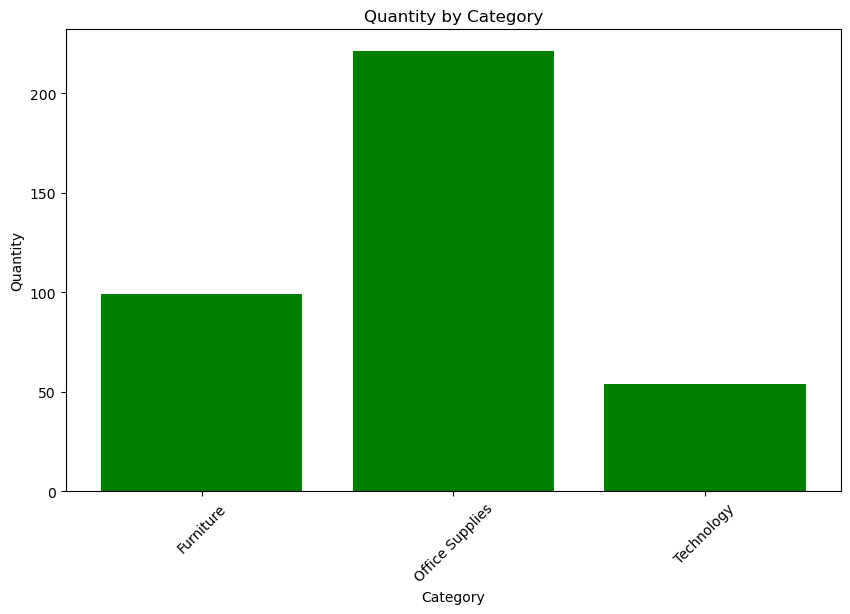

In [33]:
import matplotlib.pyplot as plt 

# Bar chart of sales by category
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Bar chart of sales by category
plt.figure(figsize=(10, 6))
plt.bar(df_aggregated['Category'], df_aggregated['Sales'], color='blue')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')



# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()




# Bar chart for Quantity
plt.figure(figsize=(10, 6))
plt.bar(df_aggregated['Category'], df_aggregated['Quantity'], color='green')
plt.title('Quantity by Category')
plt.xlabel('Category')
plt.ylabel('Quantity')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


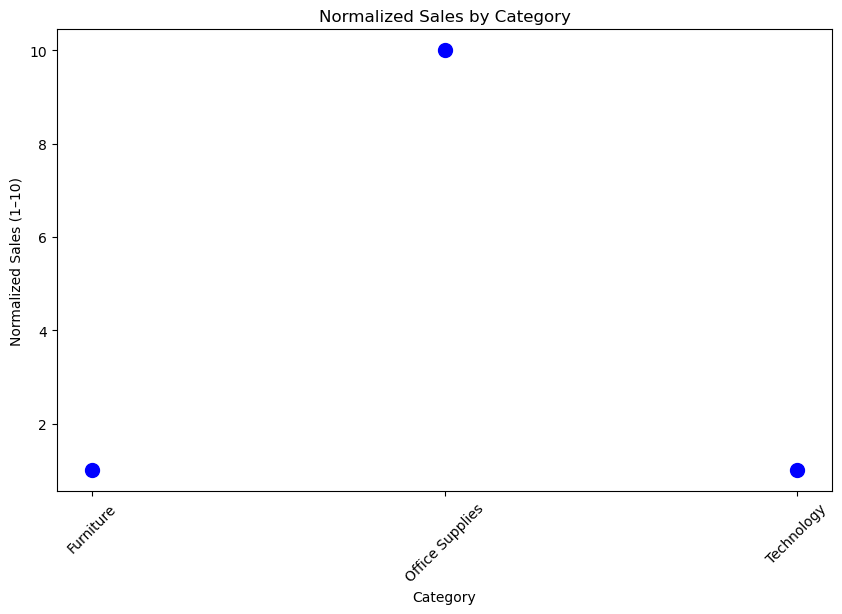

In [24]:
import matplotlib.pyplot as plt
import numpy as np


data = {
    'Category': ['Furniture', 'Office Supplies', 'Technology'],
    'Sales': [2.619673e+118, 1.462224e+259, 9.071529e+75],
    'Quantity': [99, 221, 54],
    'Profit': [-13658681.0, 7115988.0, 7008786.0]
}

# Create a normalized version of 'Sales'
sales = np.array(data['Sales'])
normalized_sales = (sales - sales.min()) / (sales.max() - sales.min()) * 9 + 1

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Category'], normalized_sales, color='blue', s=100)
plt.title('Normalized Sales by Category')
plt.xlabel('Category')
plt.ylabel('Normalized Sales (1–10)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


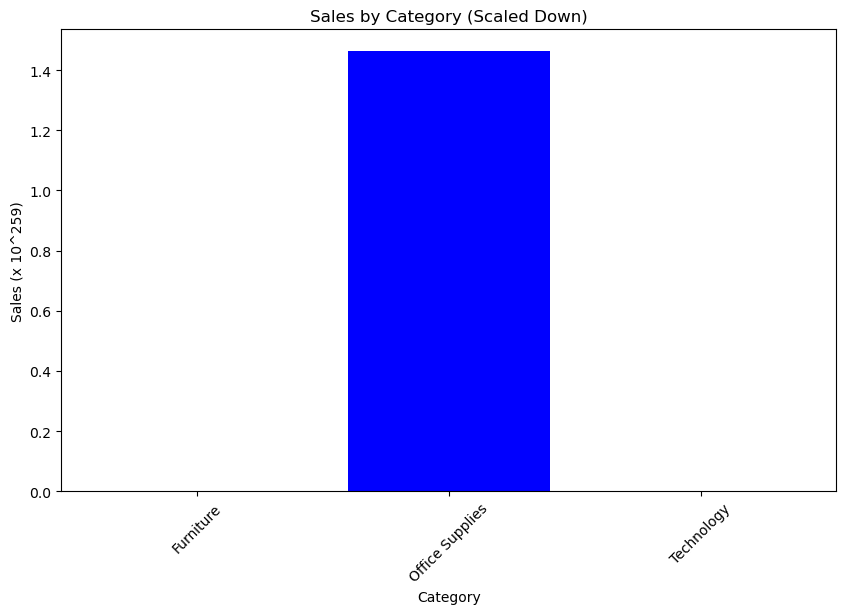

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Example data from your table
data = {
    'Category': ['Furniture', 'Office Supplies', 'Technology'],
    'Sales': [2.619673e+118, 1.462224e+259, 9.071529e+75],
}

# Reduce scale of 'Sales' by dividing by a large factor (e.g., 10^250)
scale_factor = 1e+259  # Choose a scale factor large enough for visibility
scaled_sales = [sale / scale_factor for sale in data['Sales']]

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(data['Category'], scaled_sales, color='blue')
plt.title('Sales by Category (Scaled Down)')
plt.xlabel('Category')
plt.ylabel(f'Sales (x 10^{int(np.log10(scale_factor))})')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [37]:
# Save the result back to a CSV file
df_aggregated.to_csv("cleaned_updated_file.csv", index=False, sep=";")

with open('cleaned_updated_file.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        print(lines)

['Category;Sales;Quantity;Profit']
['Furniture;2.6196731949575777e+118;99;-13658681.0']
['Office Supplies;1.4622236872818503e+259;221;7115988.0']
['Technology;9.071529114242136e+75;54;7008786.0']
